In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Text(0.5, 0, 'BP')

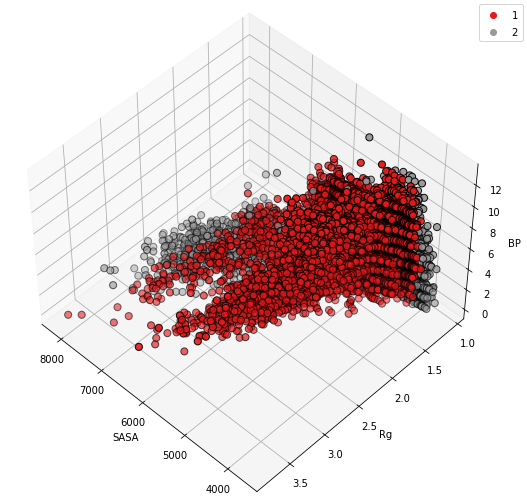

In [11]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

X = pd.read_csv("/home/klyuchnikov/Desktop/Nodes/gnode4/home/alexander/PPMO/thermal_unfolding_rabi/22-mer_pmo.csv")
X.drop('Frame', axis=1, inplace=True)

fig = plt.figure(1, figsize=(7,7))

ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
scatter = ax.scatter(X.loc[:,"SASA"], X.loc[:,"Rg"], X.loc[:,"BP"],
          c=X.loc[:,"class"], edgecolor="k", s=50, cmap='Set1')
#ax.legend(list(set(X.loc[:,"class"])))
elems = list(scatter.legend_elements())
#ax.legend()
fig.legend(*elems)
ax.set_xlabel("SASA")
ax.set_ylabel("Rg")
ax.set_zlabel("BP")

In [15]:
X = pd.read_csv("/home/klyuchnikov/Desktop/PROJECTS/Sarepta/PPMO/30mer/thermal unflding/30-mer.csv")
xbs = X[X['BS'].between(0, 3)]
xbsX = xbs[xbs['X'].between(3, 10)]
xbsXRg = xbsX[xbsX['Rg'].between(1,3)]
print(xbsXRg['H'].mean())
xbsXRg

nan


,Frame,X,Rg,BP,BS,SASA,class,H
1364,NaN,3.208876,1.551193,5.0,3.0,6257.9328,1.0,NaN


In [8]:
X = pd.read_csv("/home/klyuchnikov/Desktop/Nodes/gnode4/home/alexander/PPMO/thermal_unfolding_rabi/22-mer_water_pmo.csv")


xRg = X[X['Rg'].between(1.6,2.5)]
xRgX = xRg[xRg['X'].between(4.1, 5)]
xRgXbs = xRgX[xRgX['BS'].between(0, 2)]

print(xRgXbs['H'].mean())
xRgXbs

nan


,Frame,X,Rg,BP,BS,eRMSD,SASA,class,MolNo,H
3573,46,4.551803,2.056319,1,2,NaN,5678.7222,1,96,NaN
6060,235,4.371009,1.680153,1,2,NaN,5364.9999,1,275,NaN
11513,4,4.489072,1.782323,1,1,NaN,5721.4828,1,F4,NaN
11516,7,4.203796,1.879540,2,2,NaN,5268.3861,1,F4,NaN
13432,2,4.963026,2.215495,0,2,NaN,5694.2382,1,F6,NaN
13443,13,4.416461,1.793814,2,2,NaN,4886.5696,1,F6,NaN


In [45]:
X = pd.read_csv("/home/farkhad/PPMO/22-mer/thermal unfolding/22-mer_new.csv")
X.drop('Frame', axis=1, inplace=True)
X.drop('SASA', axis=1, inplace=True)
X.drop('BP', axis=1, inplace=True)


y = X.iloc[:,-1]
X = X.iloc[:,0:4]
X

,X,Rg,BS,eRMSD
0,7.564552,2.828130,3,NaN
1,4.624881,2.345273,6,NaN
2,5.266945,2.433324,4,NaN
3,7.188259,2.584433,4,NaN
4,6.648243,2.535126,3,NaN
...,...,...,...,...
19803,4.447297,2.144393,0,NaN
19804,4.087114,1.790091,1,NaN
19805,5.727413,2.136049,1,NaN
19806,5.514601,2.153189,2,NaN


In [30]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=102, stratify=y)
# The SVC Class from Sklearn
models = []

models.append(('SVM', SVC(kernel='sigmoid',gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.878153 (0.003862)


In [31]:
clf = SVC(kernel='rbf',gamma='auto',C=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([2., 2., 1., ..., 1., 1., 1.])

[[960  21]
 [ 15 121]]


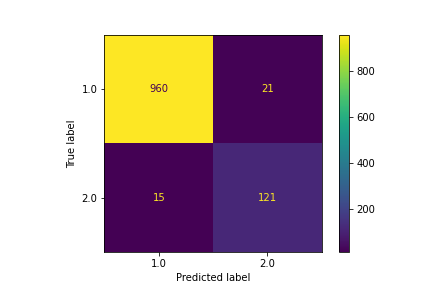

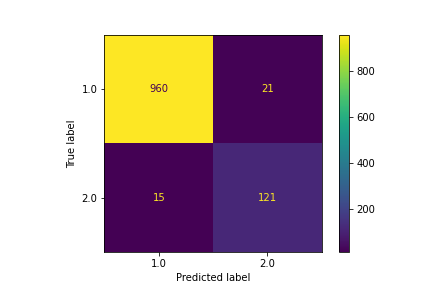

              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       981
         2.0       0.85      0.89      0.87       136

    accuracy                           0.97      1117
   macro avg       0.92      0.93      0.93      1117
weighted avg       0.97      0.97      0.97      1117



In [32]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)





disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=clf.classes_)
disp.plot()
plt.show()
## Display the visualization of the Confusion Matrix.
plt.show()
print(classification_report(y_test, y_pred))

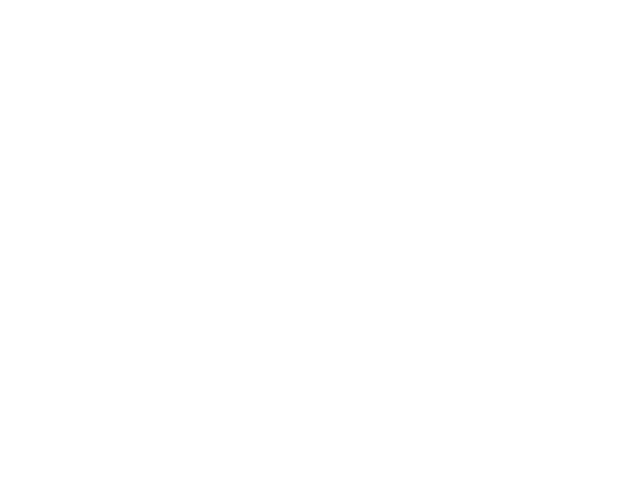

In [3]:
# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating random dataset
xs = [14, 24, 43, 47, 54, 66, 74, 89, 12,
      44, 1, 2, 3, 4, 5, 9, 8, 7, 6, 5]
  
ys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 3,
      5, 2, 4, 1, 8, 7, 0, 5]
  
zs = [9, 6, 3, 5, 2, 4, 1, 8, 7, 0, 1, 2, 
      3, 4, 5, 6, 7, 8, 9, 0]
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')
  
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
plt.show()

In [2]:
pip install npm


Note: you may need to restart the kernel to use updated packages.
